# 4.- Euler-Maruyama class

In the previous notebook, we explained the essential concepts required to understand the Euler-Maruyama (EM) method. We also analysed the approximation error of the EM method with a basic example, which required the repetitive execution of a set of Python functions. To simplify this procedure, we can resort to a Python class. The aim of this notebook is to show a basic Python class implementation of the EM method. We will highlight the benefits that the object-oriented programming provides in terms of modularity and code reusability. Note that this notebook assumes a basic understanding of Python classess structure and functionality. For a more in-depth review of Python classes, you can check the following course from the Research Computing & Data Science Skills Courses:
* https://github.com/ImperialCollegeLondon/python_oop_course

## Contents
### [A. The Euler-Maruyama class](#em-class)
### [B. Inheritance](#inheritance)
### [C. Coefficient class](#coefficient)

<a id="sde"></a>
### A. The Euler-Maruyama class

The EM class has been implemented in a separated file: `src/euler_maruyama/euler_maruyama.py`. First of all, we can import it to use in this notebook. To import the class, ensure that the Python package of this Github repository has been installed. For detailed instructions on setting up the package in your preferred local environment, please refer to the README.md file of this repository.

The following code cells contain an example of how we may use this class to solve a EM problem. This demonstrates how to use the class.

In [1]:
import matplotlib.pyplot as plt

from euler_maruyama import EulerMaruyama

In [2]:
# Print the class docstring to show its information
print(EulerMaruyama.__doc__)

Class to perform the numerical solution of a Stochastic Differential Equation (SDE) through the Euler-Maruyama method.

    Considering a SDE of the form: dX_t = mu(X_t, t)dt + sigma(X_t, t)dW_t, the solution of this SDE over
    the time interval [t_0, t_n] can be approximated as follows:

                    Y_{n+1} = Y_n + mu(Y_n, tau_n)(tau_{n+1} -  tau_n) + sigma(Y_n, tau_n)(W_{tau_{n+1}} - W_{tau_n})

    with initial condition Y_0 = X_0 and where the time interval is discretised:

                    t_0 = tau_0 < tau_1 <  ... < tau_n  = t_n

    with Delta_t = tau_{n+1} - tau_n = (t_n - t_0) / n and DeltaW_n = (W_{tau_{n+1}} - W_{tau_n}) ~ N(0, Delta_t)
    because W_t is a Wiener process, so-called Brownian motion.

    Parameters
    ----------
    t_0: float
        Initial time.

    t_n: float
        Final time.

    n_steps: int
        Number of time steps to discretise the time interval [t_0, t_n].

    X_0: float
        Initial condition of the SDE.

    drift: Coeff

In [3]:
# Also import the drift and diffusion Coefficients
# We will discuss this coefficients in detail in section C

from euler_maruyama import ConstantDiffusion, LinearDrift

linear_drift = LinearDrift(a=1)  # drift (mu) = 1*t
constant_diffusion = ConstantDiffusion(b=2.5)  # diffusion (sigma) = 2.5 

In [4]:
# Run one solution with 1000 simulated trajectories
em = EulerMaruyama(t_0=0, t_n=2, n_steps=100, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = em.compute_numerical_approximation()

title=f"Number of time steps: {em.n_steps}, $\delta$ = {em.delta}"
em.plot_approximation(title=title)

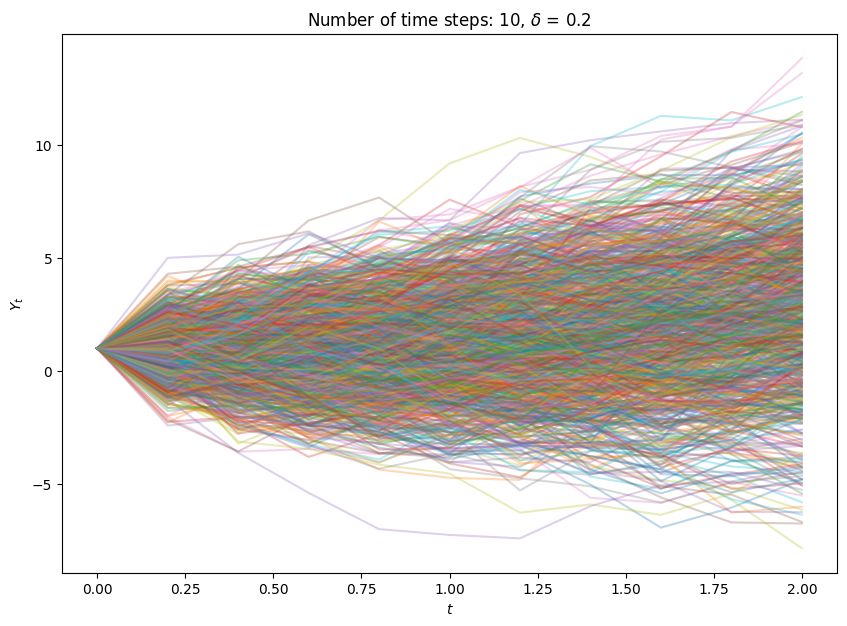

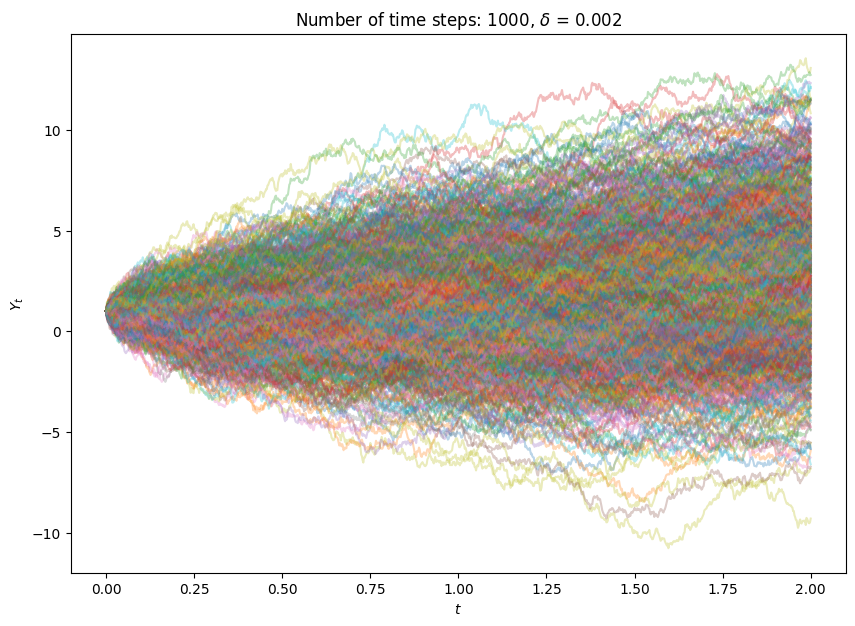

In [5]:
# We can see how easy is to change parameters thanks to the class __init__ method
em = EulerMaruyama(t_0=0, t_n=2, n_steps=10, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = em.compute_numerical_approximation()
title=f"Number of time steps: {em.n_steps}, $\delta$ = {em.delta}"
em.plot_approximation(title=title)

em = EulerMaruyama(t_0=0, t_n=2, n_steps=1000, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = em.compute_numerical_approximation()
title=f"Number of time steps: {em.n_steps}, $\delta$ = {em.delta}"
em.plot_approximation(title=title)

This is really useful. By encapsulating the logic of the EM method within the class, we can efficiently solve the SDE. Additionaly, the class provides seamless analysis of the obtained solution with respect to the parameters modification of the EM method. 

<a id="inheritance"></a>
### B. Inheritance

So far, we have seen the advantages of using the `EulerMaruyama` class for our project. However, to analyse the perfomance of the EM method, we need to change specific parameters of the `EulerMaruyama` class. This change requires us to input all parameters again in the class `__init__` method. This might seem a tedious task. To address this issue, we would like to find a way to change only one parameter but keeping the rest unchanged. For this purpose, we introduce another Python class that replicates such desired functionality. Based on this new class, we introduce the concept of class inheritance. 

Class inheritance is a fundamental feature in object-oriented programming (OOP) where a class can inherit properties and methods from another parent class, called the base class. The subclass or child class copies by default the attributes and methods of the superclass. This inheritance fosters code reuse, organization and modularity. This hierarchical relationship enables the subclass to extend or modify the functionality of the superclass, facilitating the creation of specialized classes while maintaining a cohesive code structure.

Based on this simple explanation, we see that class inheritance aligns with the required functionality that we expressed earlier. Specifically, we want to keep `EulerMaruyama` class unchanged, but we want to have a new instance that mimics `EulerMaruyama` class behaviour and extends its functionality. Note that our goal in this section is really simple, but it is sufficient to illustrate the concept of class inheritance.

See the `CustomEulerMaruyama` class in `src/euler_maruyama/euler_maruyama.py`, where we have carried out the class inheritance. To indicate inheritance, all we have to do is to define the class as follows:

``` 
class CustomEulerMaruyama(EulerMaruyama):
```

This directive implies that `CustomEulerMaruyama` class is a child class of `EulerMaruyama`, inheriting all its attributes and methods by default.

In [6]:
from euler_maruyama import CustomEulerMaruyama

In [7]:
print(CustomEulerMaruyama.__doc__)

Class that extends EulerMaruyama to change number of simulations and number of time steps.

    Parameters
    ----------
    t_0: float
        Initial time.

    t_n: float
        Final time.

    n_steps: int
        Number of time steps to discretise the time interval [t_0, t_n].

    X_0: float
        Initial condition of the SDE.

    drift: Coefficient
        Drift (mu) coefficient of the SDE.

    diffusion: Coefficient
        Diffusion (sigma) coefficient of the SDE.

    n_sim: int
        Number of simulated approximations.

    Methods
    -------
    change_n_sim
    change_n_steps
    


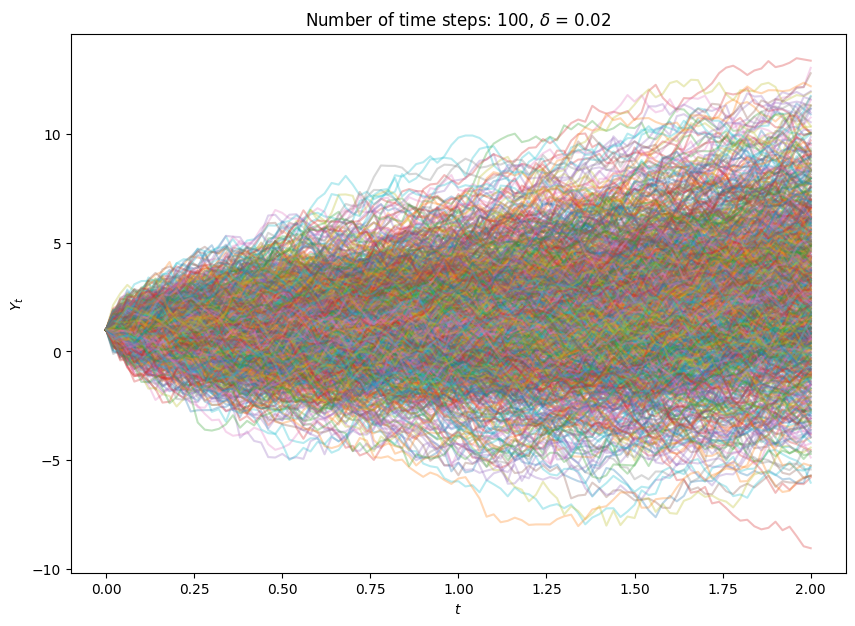

In [8]:
# Define the instance as in EulerMaruyama class
custom_em = CustomEulerMaruyama(t_0=0, t_n=2, n_steps=100, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}"
custom_em.plot_approximation(title=title)

Note that `CustomEulerMaruyama` have the same attributes and methods that `EulerMaruyama` class, but it has two new methods, namely `change_n_steps` and `change_n_sim`. We can see the docstring of each method to understand their purpose.

In [9]:
print(custom_em.change_n_steps.__doc__)

Change the number of time steps attribute and recalculate the discretisation.

        Parameters
        ----------
        new_n_steps: int
            The new number of steps of the EM method.
        


In [10]:
print(custom_em.change_n_sim.__doc__)

Change the number of simulated approximations.

        Parameters
        ----------
        new_n_sim: int
            The new number of simulated approximations of the EM method.
        


In a nutshell, both methods modify an attribute of the class, and take into account possible side effects. For example, the `change_n_steps` method changes the number of time steps attribute and computes the new delta and time steps array. Let us see both methods in action.

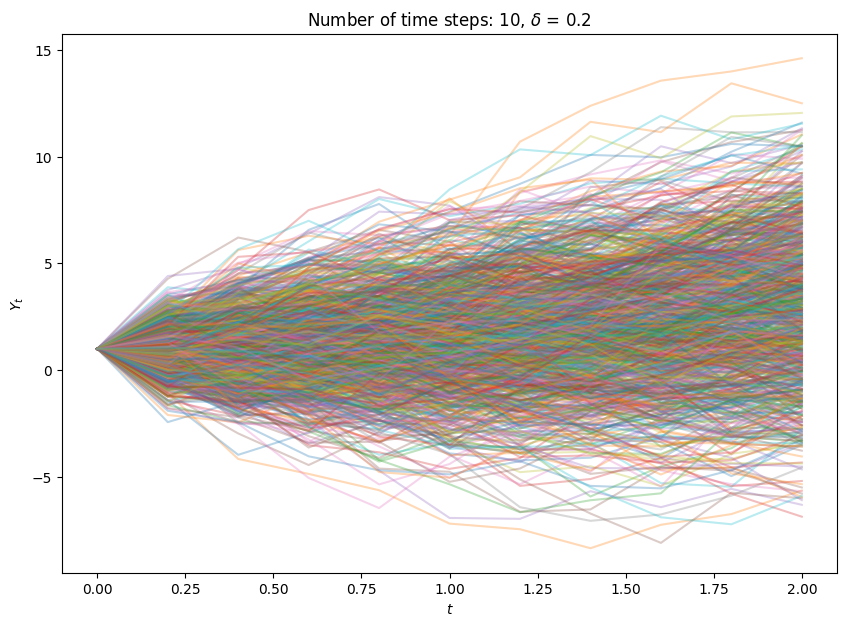

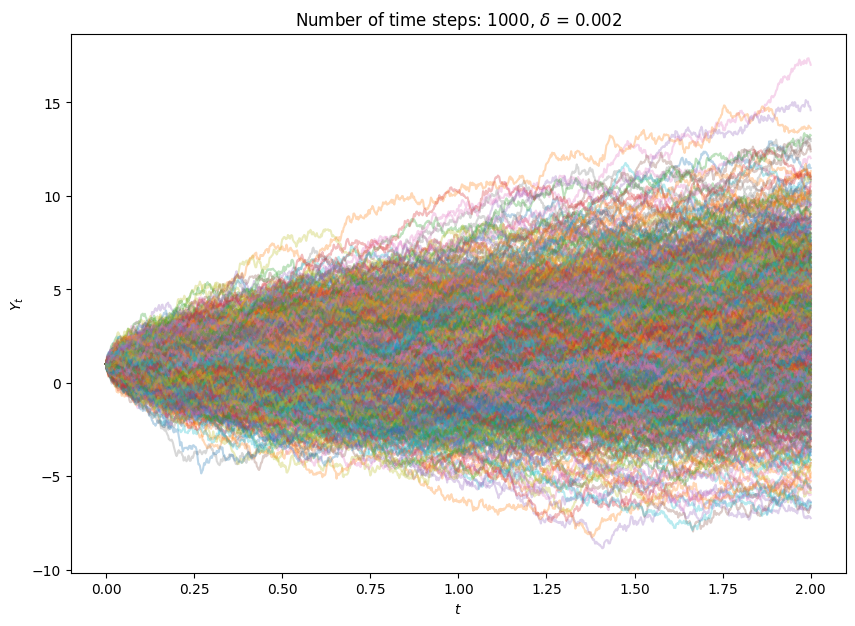

In [11]:
custom_em.change_n_steps(new_n_steps=10)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}"
custom_em.plot_approximation(title=title)

custom_em.change_n_steps(new_n_steps=1000)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}"
custom_em.plot_approximation(title=title)

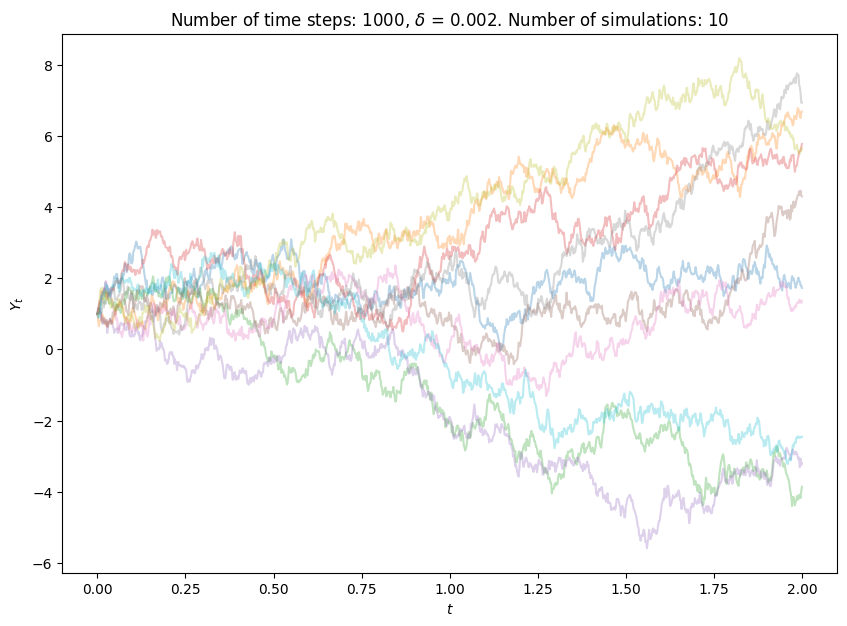

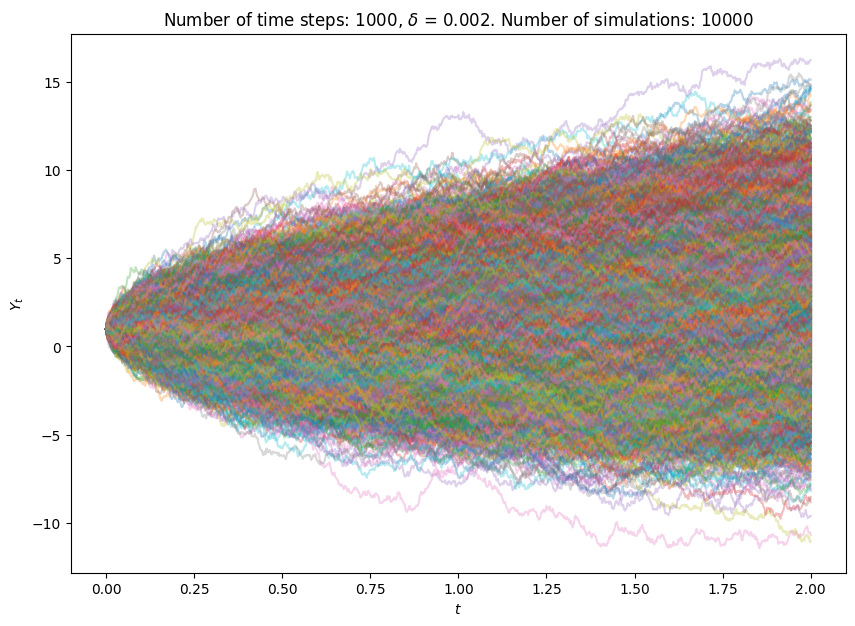

In [12]:
# And repeat the process with the number of simulations
custom_em.change_n_sim(new_n_sim=10)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}. Number of simulations: {custom_em.n_sim}"
custom_em.plot_approximation(title=title)

custom_em.change_n_sim(new_n_sim=10000)
Y = custom_em.compute_numerical_approximation()

title=f"Number of time steps: {custom_em.n_steps}, $\delta$ = {custom_em.delta}. Number of simulations: {custom_em.n_sim}"
custom_em.plot_approximation(title=title)

<a id="coefficient"></a>
### C. Coefficient class

Last but not least, we explain the purpose and functionality of `Coefficient` class. This is an asbtract class implemented in `src/euler_maruyama/coefficients.py` file. 

In object-oriented programming, an abstract class is a class that cannot be instantiated directly. It serves as a template for other classes, defining common attributes and methods that derived classes should implement. Abstract classes often contain abstract methods, which are declared but have no implementation in the abstract class itself. Classes that inherint from an abstract class must provide concrete implementations for the abstract methods. The abstract class pattern is useful for creating a common interface and enforcing a specific structure among related classes.

To define an abstract class all we have to do is:

```
from abc import ABC, abstractmethod

class Coefficient(ABC):
```

This makes `Coefficient` class an abstract class. Now we can define some abstract methods within it. Particularly, we would like to implement a `get_value` method to compute the drift and diffusion coefficients at any particular time step. Internally, the `EulerMaruyama` class will call the method `get_value` of each coefficient at every time step. Therefore, all drift and diffusion coefficients must implement this method to guarantee the integration between the two classes. By defining an astract method, this integration is achieved. Due to the abstract method implementation we can effortlessly define different coefficient types, ensuring that the drift-diffusion coefficients are compatible with the `EulerMaruyama` class. To define an abstract method we have to define the method class with the `@abstractmethod` decorator, like this:

```
class Coefficient(ABC):

    def __init__(self):
        pass

    @abstractmethod
    def get_value(self, X: np.ndarray, t: float) -> np.ndarray:
        raise NotImplementedError
```

Then, every drift and diffusion coefficient must be implemented as a child class of Coefficient class. We can import some examples we have defined:

In [13]:
from euler_maruyama.coefficients import ConstantDiffusion, LinearDrift, MeanReversionDrift, MultiplicativeNoiseDiffusion

In [15]:
# Drift coefficients
print(LinearDrift.__doc__)

Implement a linear drift of the form:

                        mu(X_t, t) = a*t

    where a is a real value parameter.

    Parameters
    ---------
    a: float
        The linear coefficient of drift

    Methods
    -------
    get_value
    


In [16]:
print(MeanReversionDrift.__doc__)

Implement a mean-reversion drift of the form:

                        mu(X_t, t) = theta*(mean - X_t)

    where theta and mean are real value parameters.

    Parameters
    ---------
    theta: float
        The speed of reversion.

    mean: float
        The equilibrium value.

    Methods
    -------
    get_value
    


In [18]:
# Diffusion coefficients
print(ConstantDiffusion.__doc__)

Implement a constant diffusion of the form:

                        sigma(X_t, t) = b

    where b is a real value parameter.

    Parameters
    ---------
    b: float
        The constant diffusion value.

    Methods
    -------
    get_value
    


In [19]:
print(MultiplicativeNoiseDiffusion.__doc__)

Implement a multiplicative noise-like diffusion of the form:

                        sigma(X_t, t) = b*X_t

    where b is a real value parameter.

    Parameters
    ---------
    b: float
        The amplitude of the multiplicative noise.

    Methods
    -------
    get_value
    


Now, we can test the drift and diffusion behaviour using our `EulerMaruyama` class.

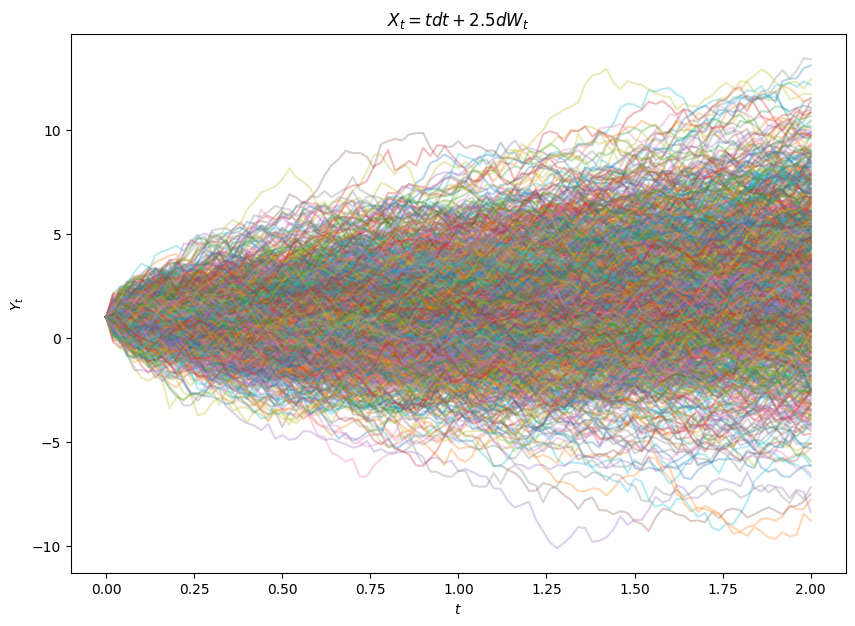

In [63]:
linear_drift = LinearDrift(a=1)  # drift (mu) = 1*t
constant_diffusion = ConstantDiffusion(b=2.5)  # diffusion (sigma) = 2.5 

em = EulerMaruyama(t_0=0, t_n=2, n_steps=100, X_0=1, drift=linear_drift, diffusion=constant_diffusion, n_sim=1_000)
Y = em.compute_numerical_approximation()

title=r"$X_t = tdt + 2.5dW_t$"
em.plot_approximation(title=title)

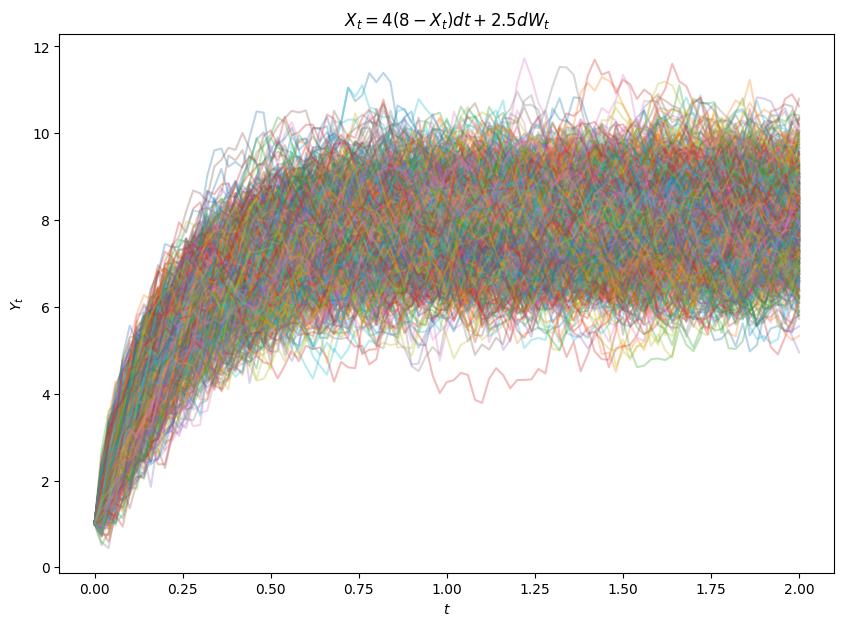

In [64]:
# Let us change the drift coefficient
mean_reversion_drift = MeanReversionDrift(theta=4, mean=8)  # drift (mu) = 4*(8-X_t)

em.drift = mean_reversion_drift

Y = em.compute_numerical_approximation()

title=r"$X_t = 4(8-X_t)dt + 2.5dW_t$"
em.plot_approximation(title=title)

Given that the initial value is $X_0=1$, and the equilibrium value of the mean-reverting process is $8$, the drfit in the inital steps exhibit a substantial drift compared to the random noise introduced by the Brownian motion. During these early time steps, the drift dominates the dynamics of the process $X_t$. Once the process $X_t$ approaches the vicinity of the equilibrium value, the diffusion becomes the prevailing factor, as the drift is almost negligible.

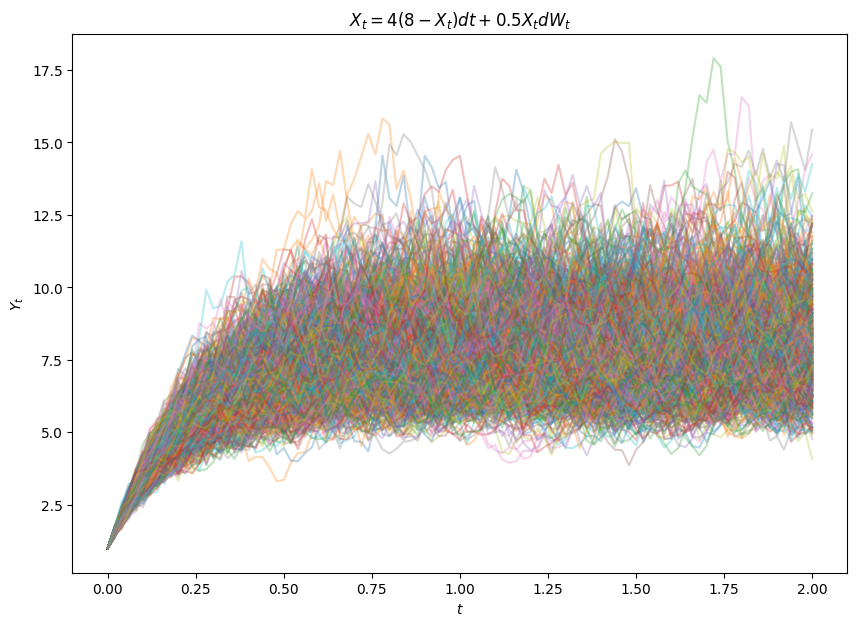

In [65]:
# Let us change the diffusion coefficient

multiplicative_noise = MultiplicativeNoiseDiffusion(b=0.5)  # diffusion (sigma) = 0.5*X_t

em.diffusion = multiplicative_noise

Y = em.compute_numerical_approximation()

title=r"$X_t = 4(8-X_t)dt + 0.5X_tdW_t$"
em.plot_approximation(title=title)

We see the same drift-diffusion dynamics that in the previous example. However, the multiplicative noise amplifies the uncertainty of $X_t$ when the process reaches the equilibrium value. Additionally, an increased number of simulated trajectories of $X_t$ momentarily deviate from the equilibrium value due to the influence of multiplicative noise.
However, these deviations are transient, and the trajectories quickly converge back to the equilibrium value as the mean-revesion drift becomes significant again.

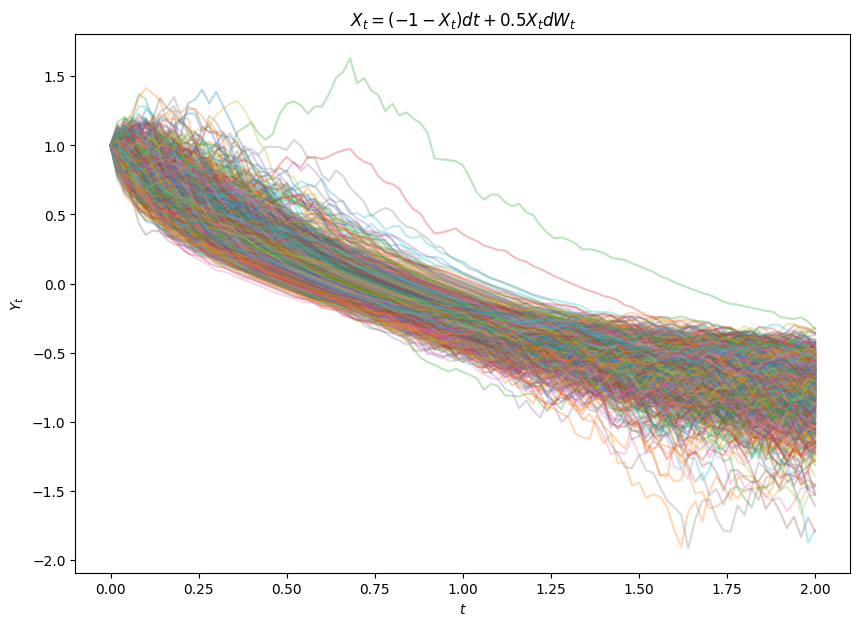

In [42]:
# And change the drift again 

neg_mean_reversion_drift = MeanReversionDrift(theta=1, mean=-1)  # drift (mu) = (-1-X_t)

em.drift = neg_mean_reversion_drift

Y = em.compute_numerical_approximation()

title=r"$X_t = (-1-X_t)dt + 0.5X_tdW_t$"
em.plot_approximation(title=title)

Finally, in this example, we parametrise a negative equilibrium value of $-1$, leading to an interesting phenomenon. Now, the process $X_t$ that starts at $X_0 = 1$ must cross the region of $X_t = 0$. Within this region, the multiplicative noise almost vanishes, leaving the whole process as a quasi-deterministic process, where the uncertainty is negligible. During this transient period, the behaviour of the process is entirely driven by the mean-reversion drift. This characteristic can be observed mostly between $t=0.3$ and $t=1.25$, where the random trajectories cluster around $X_t=0$.